In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fun(x, y):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, linewidth=2) 
    plt.grid()
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

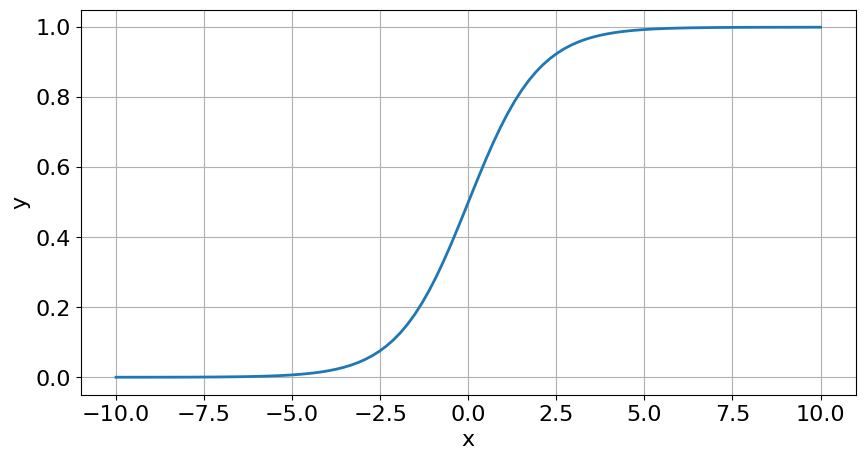

In [8]:
import torch
from torch import nn

x = torch.from_numpy(np.linspace(-10, 10, 100)) 
y = nn.Sigmoid()(x)
plot_fun(x, y)

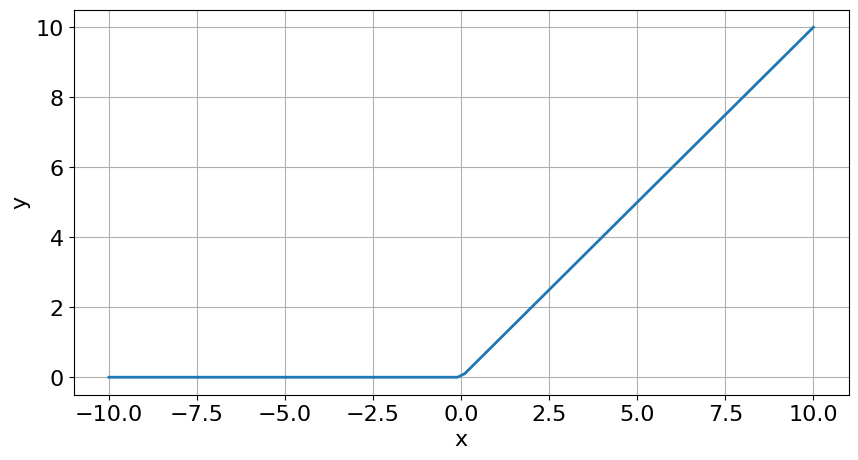

In [10]:
x = torch.from_numpy(np.linspace(-10, 10, 100)) 
y = nn.ReLU()(x)
plot_fun(x, y)

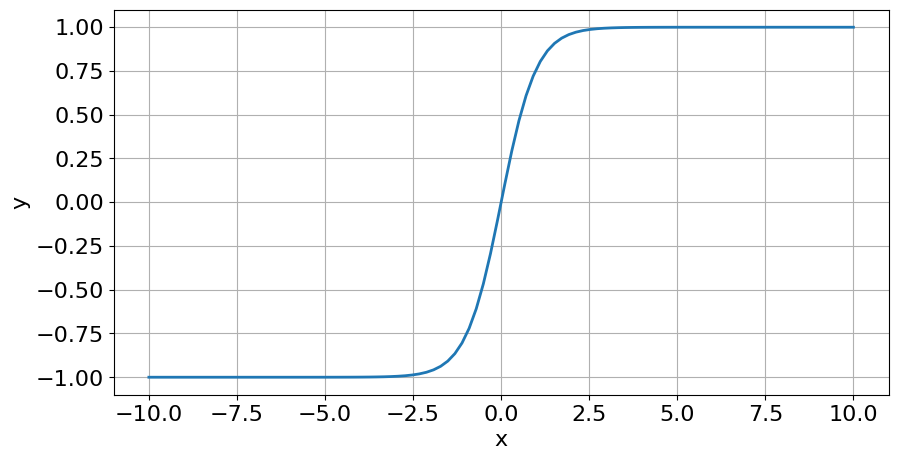

In [12]:
x = torch.from_numpy(np.linspace(-10, 10, 100)) 
y = nn.Tanh()(x)
plot_fun(x, y)

In [18]:
x = torch.tensor([1.0, 0.5])
print(x.shape)
x = x.unsqueeze(0)
print(x.shape)

W1 = torch.tensor([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = torch.tensor([0.1, 0.2, 0.3])
print(W1.shape)
print(B1.shape)

A1 = torch.mm(x, W1) + B1
Z1 = nn.Sigmoid()(A1)
print(A1)
print(Z1)

torch.Size([2])
torch.Size([1, 2])
torch.Size([2, 3])
torch.Size([3])
tensor([[0.3000, 0.7000, 1.1000]])
tensor([[0.5744, 0.6682, 0.7503]])


In [19]:
W2 = torch.tensor([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = torch.tensor([0.1, 0.2])
print(W2.shape)
print(B2.shape)

A2 = torch.mm(Z1, W2) + B2
Z2 = nn.Sigmoid()(A2)
print(A2)
print(Z2)

torch.Size([3, 2])
torch.Size([2])
tensor([[0.5162, 1.2140]])
tensor([[0.6262, 0.7710]])


In [21]:
def identity_function(x):
    return x

W3 = torch.tensor([[0.1, 0.3], [0.2, 0.4]])
B3 = torch.tensor([0.1, 0.2])
A3 = torch.mm(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

tensor([[0.3168, 0.6963]])


In [24]:
def init_network():
    network = {}
    network['W1'] = torch.tensor([[0.1, 0.3, 0.5], 
                                  [0.2, 0.4, 0.6]])
    network['b1'] = torch.tensor([0.1, 0.2, 0.3])
    network['W2'] = torch.tensor([[0.1, 0.4], 
                                  [0.2, 0.5], 
                                  [0.3, 0.6]])
    network['b2'] = torch.tensor([0.1, 0.2])
    network['W3'] = torch.tensor([[0.1, 0.3], 
                                  [0.2, 0.4]])
    network['b3'] = torch.tensor([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = torch.mm(x, W1) + b1
    z1 = nn.Sigmoid()(a1)
    a2 = torch.mm(z1, W2) + b2
    z2 = nn.Sigmoid()(a2)
    a3 = torch.mm(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = torch.tensor([1.0, 0.5]).unsqueeze(0)
y = forward(network, x)
print(y)

tensor([[0.3168, 0.6963]])


In [25]:
x = torch.tensor([0.3, 2.9, 4.0])
y = nn.Softmax(dim=0)(x)
print(y)
print(torch.sum(y))

tensor([0.0182, 0.2452, 0.7366])
tensor(1.)
